# Data Visualization with matplotlib

## Visualization using the matplotlib library

 __*Customization of plots is left as an excercise for the students to work on*__

In [1]:

import csv #Imports csv module to load data into python namespace
with open("covid_19_data.csv","r") as file:# Using context manager to handle opening of file. File is sopened in read mode
    print(file) # prints a file object 

<_io.TextIOWrapper name='covid_19_data.csv' mode='r' encoding='cp1252'>


In [2]:
with open("covid_19_data.csv","r") as file:
    for row in file:
        print(row)# prints each row of the file 
        break

SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered



Since the above code prints each row as a string , more manipulations needs to be done to extract required data items , hence the need of the csv module to ease the process.
This is what the snippet below takes care of

In [3]:
with open("covid_19_data.csv","r") as file:
    csv_reader=csv.reader(file) #Uses the read method to extract items in each row as a list item
    for row in csv_reader:# csv_reader is an iterable
        print(row)# prints each observation as a list
        break

['SNo', 'ObservationDate', 'Province/State', 'Country/Region', 'Last Update', 'Confirmed', 'Deaths', 'Recovered']


## Convertion to hash map

It will be easier to work with a dictionary  instead of a list , hence the csv *DictRader* method is used to take care of this

In [4]:
with open("covid_19_data.csv","r") as file:
    csv_reader=csv.DictReader(file)# Returns a dictionary
    for row in csv_reader:
        print(row)
        break

OrderedDict([('SNo', '1'), ('ObservationDate', '01/22/2020'), ('Province/State', 'Anhui'), ('Country/Region', 'Mainland China'), ('Last Update', '1/22/2020 17:00'), ('Confirmed', '1.0'), ('Deaths', '0.0'), ('Recovered', '0.0')])


In [22]:
with open("covid_19_data.csv","r") as file:
    csv_reader=csv.DictReader(file)
    for row in csv_reader:
        print(row['Confirmed'])# returns the item with a key of "confirmed"
        break

1.0


In [30]:
with open("covid_19_data.csv","r") as file:
    csv_reader=csv.DictReader(file)
    sum_of_confirmed_cases=0 # initialises the total confirmed cases
    sum_of_deaths=0 # initialises the total number of deaths
    sum_of_recovered_cases=0 # initialises the total number of recovery
    sum_of_cases=[]
    for row in csv_reader:
        sum_of_confirmed_cases +=float(row['Confirmed'])
        sum_of_deaths +=float(row['Deaths'])
        sum_of_recovered_cases +=float(row['Recovered'])
sum_of_cases.append(sum_of_confirmed_cases)
sum_of_cases.append(sum_of_deaths)
sum_of_cases.append(sum_of_recovered_cases)
print(sum_of_cases)
cases=["Confirmed","Deaths","Recovered"]

[3629156.0, 116833.0, 1357313.0]


<BarContainer object of 3 artists>

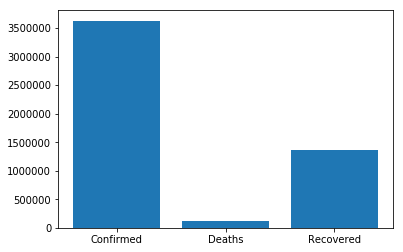

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.bar(cases,sum_of_cases)

([<matplotlib.patches.Wedge at 0xc7ba94c550>,
 [Text(-0.677303,0.866753,'Confirmed'),
  Text(-0.257099,-1.4778,'Deaths'),
  Text(0.737837,-0.815841,'Recovered')])

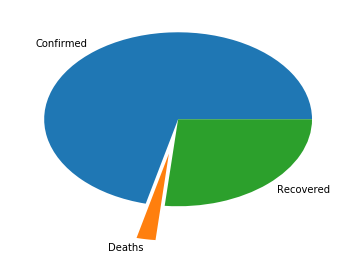

In [29]:
plt.pie(sum_of_cases,labels=cases,explode=(0,0.4,0)) #explode=(0,0.4,0) extracts the second item in the list

The code below is a modification to snippet [6] above. It initializes each sum as an element of a list

In [25]:
with open("covid_19_data.csv","r") as file:
    csv_reader=csv.DictReader(file)
    sum_of_cases=[0]*3 # create the list [0,0,0]
    for row in csv_reader:
        sum_of_cases[0] +=float(row['Confirmed']) # converts the item to a float , then increaments the value in the list
        sum_of_cases[1] +=float(row['Deaths'])
        sum_of_cases[2] +=float(row['Recovered'])

print(sum_of_cases)
cases=["Confirmed","Deaths","Recovered"]

[3629156.0, 116833.0, 1357313.0]


## Rates of cases

In [26]:
with open("covid_19_data.csv","r") as file:
    csv_reader=csv.DictReader(file)
    reported_cases={"Confirmed":[],"Deaths":[],"Recovered":[]} #  A dictionary of the list of reported cases(initialization)
    for row in csv_reader:
        reported_cases["Confirmed"].append(float(row['Confirmed']))# appends each item to the list in the dictionary
        reported_cases["Deaths"].append(float(row['Deaths']))
        reported_cases['Recovered'].append(float(row['Recovered']))


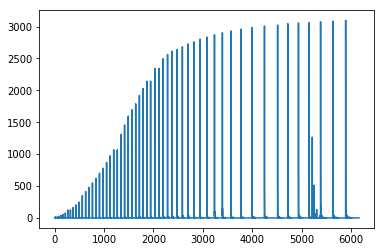

In [11]:
plt.plot(range(1,len(reported_cases["Deaths"])+1),reported_cases["Deaths"]) # a line plot for the number of deaths
#

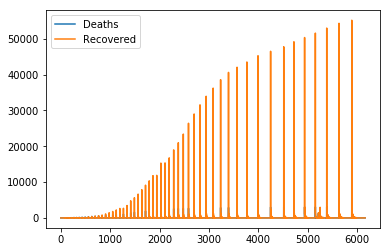

In [12]:
# A not recommended plot for number of Deaths and Recovery 
# In the plot , the cases for recovery over shadows that of deaths , since the numbers are more and it is the second plot
plt.plot(range(1,len(reported_cases["Deaths"])+1),reported_cases["Deaths"],label="Deaths")
plt.plot(range(1,len(reported_cases["Recovered"])+1),reported_cases["Recovered"],label="Recovered")
plt.legend()

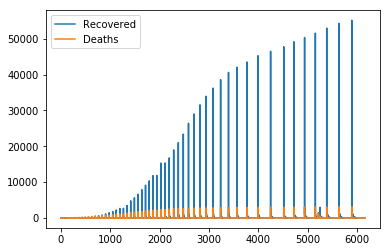

In [13]:
# The order of plot is reversed here to make the number of Deaths visible  
plt.plot(range(1,len(reported_cases["Recovered"])+1),reported_cases["Recovered"],label="Recovered")
plt.plot(range(1,len(reported_cases["Deaths"])+1),reported_cases["Deaths"],label="Deaths")
plt.legend()

Activities are given to the participants to use the stem/lollipop plot to visualize these seperately and on the same axis